In [1]:
import pandas as pd
dataset=pd.read_csv("dataset1.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#label Encoding 
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
dataset['Gender']=labelencoder.fit_transform(dataset['Gender'])
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [5]:
import numpy as np
gender=dataset['Gender'].values
age=dataset['Age'].values
income=dataset['Annual Income (k$)'].values
spent=dataset['Spending Score'].values

X=np.array(list(zip(age,income,spent,gender)))
X

array([[ 19,  15,  39,   1],
       [ 21,  15,  81,   1],
       [ 20,  16,   6,   0],
       [ 23,  16,  77,   0],
       [ 31,  17,  40,   0],
       [ 22,  17,  76,   0],
       [ 35,  18,   6,   0],
       [ 23,  18,  94,   0],
       [ 64,  19,   3,   1],
       [ 30,  19,  72,   0],
       [ 67,  19,  14,   1],
       [ 35,  19,  99,   0],
       [ 58,  20,  15,   0],
       [ 24,  20,  77,   0],
       [ 37,  20,  13,   1],
       [ 22,  20,  79,   1],
       [ 35,  21,  35,   0],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   1],
       [ 35,  23,  98,   0],
       [ 35,  24,  35,   1],
       [ 25,  24,  73,   1],
       [ 46,  25,   5,   0],
       [ 31,  25,  73,   1],
       [ 54,  28,  14,   0],
       [ 29,  28,  82,   1],
       [ 45,  28,  32,   0],
       [ 35,  28,  61,   1],
       [ 40,  29,  31,   0],
       [ 23,  29,  87,   0],
       [ 60,  30,   4,   1],
       [ 21,  30,  73,   0],
       [ 53,  33,   4,   1],
       [ 18,  33,  92,   1],
       [ 49,  

c:\Users\SIVA1201\anaconda3\envs\artsci\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\SIVA1201\anaconda3\envs\artsci\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\SIVA1201\anaconda3\envs\artsci\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SIVA1201\anaconda3\envs\artsci\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: K

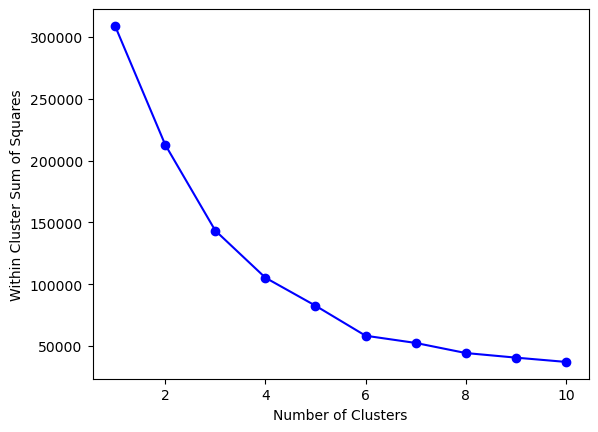

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, color='blue', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()
    

In [18]:
model=KMeans(n_clusters=6,random_state=0)
y_means=model.fit_predict(X)
d=set(y_means)
d

c:\Users\SIVA1201\anaconda3\envs\artsci\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{0, 1, 2, 3, 4, 5}

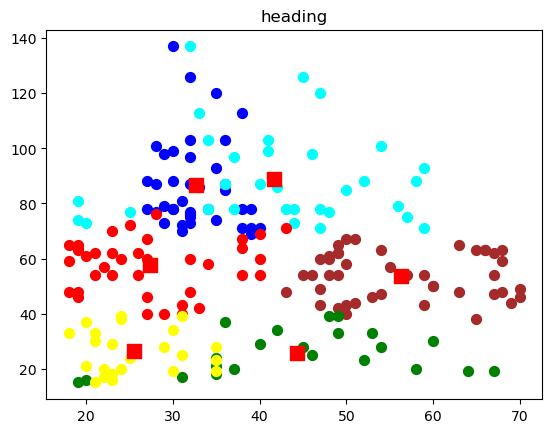

In [20]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='red',label='5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='yellow',label='6')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title("heading")
plt.show()

In [ ]:
## Four Dimentional Graph
